In [17]:
# Imports
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Constants
target = 'Class'
random_state = 42

# 1) A pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any

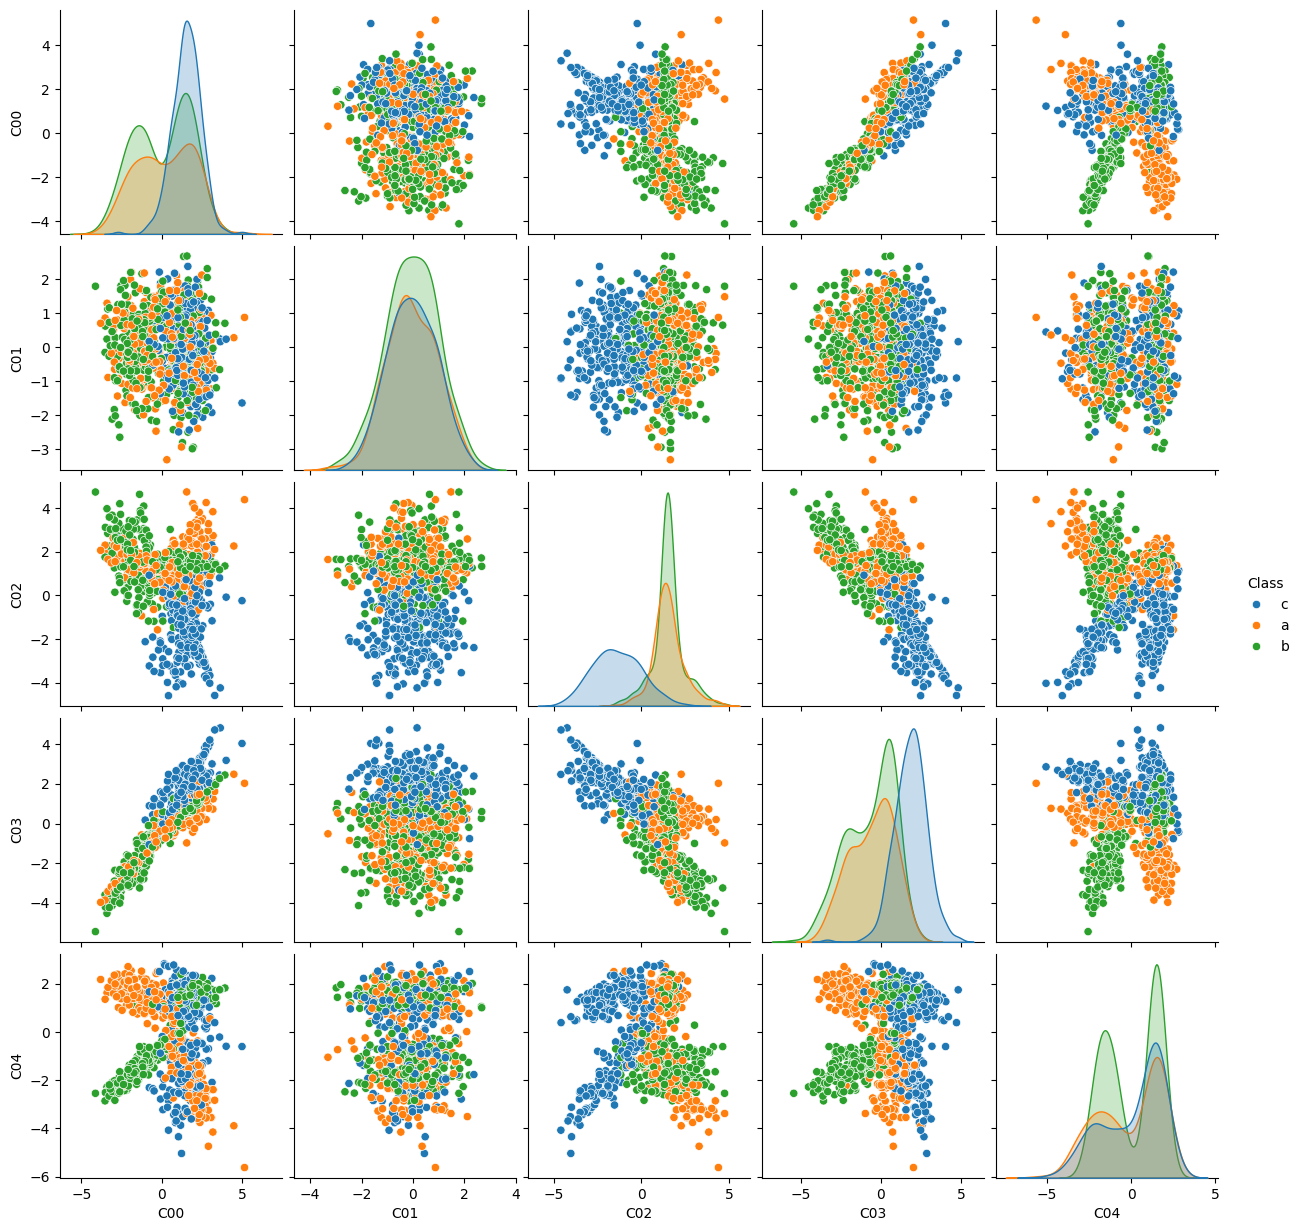

In [12]:
df = pd.read_csv('./exam_2020_01_07_data.csv')

sns.pairplot(df, hue=target)


We can see that the data is not standardized, since the value are not from 1 to 0 and since the distributions doesn't have a gaussian shape.
There are 3 clusters form the data but they are not clearly separated.

# 2) A classification model using a method of your choice with the schema "train-validation-test" exploring an appropriate range of parameter values

In [15]:
## We'll use Decision Trees #

train_size = 0.66

# We choose X and y
X = df.drop(target, axis=1)
y = df[target]

# We divide train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

# We also need validation and test sets
X_train_test, X_val, y_train_test, y_val = train_test_split(X_test, y_test, train_size=train_size, random_state=random_state)

# We need the estimator
estimator = DecisionTreeClassifier(criterion='entropy')

# We train the estimator
estimator.fit(X_train, y_train)

# We compute the accuracy of training
y_train_dt = estimator.predict(X_train)
train_accuracy = accuracy_score(y_train_dt, y_train)
print(f"The train accuracy is {train_accuracy * 100}")

# We compute the accuracy of validation
y_val_dt = estimator.predict(X_val)
val_accuracy = accuracy_score(y_val_dt, y_val)
print(f"The validation accuracy is {val_accuracy * 100}")

# We compute the accuracy of testing
y_test_dt = estimator.predict(X_test)
test_accuracy = accuracy_score(y_test_dt, y_test)
print(f"The test accuracy is {test_accuracy * 100}")

## We have to explore parameter values
fitted_max_depth = estimator.tree_.max_depth
depths = range(1, fitted_max_depth + 1) # Set to explore
scores = [] # List of scores for each depth

for depth in depths:
    # We create the DT
    DT = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=random_state)

    # We fit the DT
    DT.fit(X_train_test, y_train_test)

    # We compute the accuracy score
    y_predicted = DT.predict(X_val)
    scores.append(accuracy_score(y_val, y_predicted))

The train accuracy is 100.0
The validation accuracy is 85.34482758620689
The test accuracy is 85.58823529411764


# 3) the optimal parameter(s)

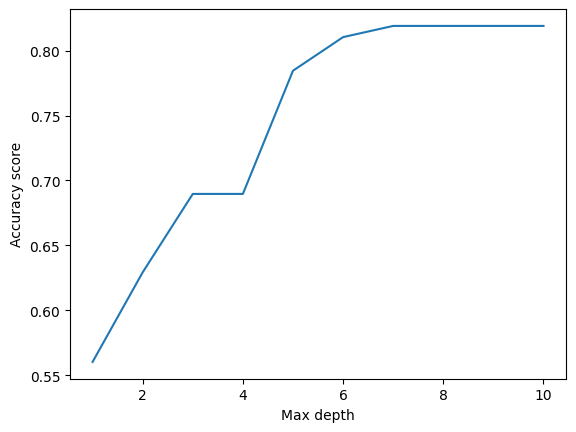

So the best depth is 7 and leads to 81.89655172413794% accuracy
The original depth was 10


In [23]:
# Visualize the accuracy
plt.xlabel('Max depth')
plt.ylabel('Accuracy score')
plt.plot(depths, scores)
plt.show()

# Extract the best hyperparameter -> depth that maximizes ccuracy
best_depth = depths[np.argmax(scores)]
print(f"So the best depth is {best_depth} and leads to {scores[best_depth-1]*100}% accuracy")
print(f"The original depth was {fitted_max_depth}")

# We now fit the estimator with the best parameters
estimator = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=random_state)
estimator.fit(X_train, y_train)
y_best_dt = estimator.predict(X_test)

# 4) a scatter plot of the test set using a pair of attributes of your choice with the class as colour 

In [25]:
X_test.head()

,C00,C01,C02,C03,C04,y_best_dt
521,-0.765030,0.323216,-0.007566,-0.594274,-1.363171,b
737,-1.375418,0.127136,1.300193,-1.698910,1.666246,a
740,-1.964488,-1.481202,1.108087,-2.076757,2.152149,a
660,-1.565714,-0.697846,-0.466063,-1.009809,-2.051192,b
411,-3.531153,-0.152986,1.758583,-3.593735,-2.857939,a


<Axes: xlabel='C01', ylabel='C02'>

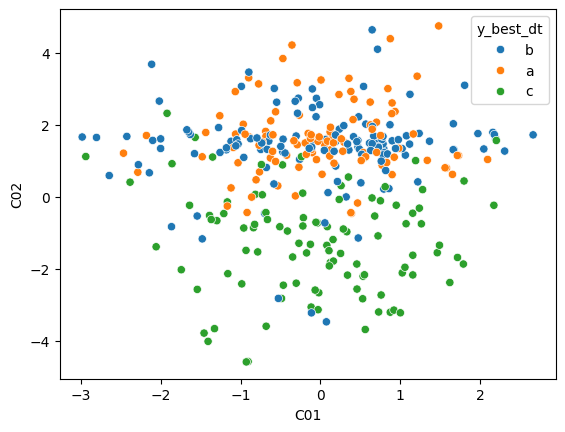

In [26]:
# We choose the attributes
attributes = ['C01', 'C02']

X_test['y_best_dt'] = y_best_dt

sns.scatterplot(x=attributes[0], y=attributes[1], data=X_test, hue='y_best_dt')

# 5) and the good/bad prediction as the point style

1) hint: the seaborn scatterplot function allows a "style" parameter which is a vector of values; this can be obtained as a comparison between the true and the 
predicted target in the test set, see 

<Axes: xlabel='C01', ylabel='C02'>

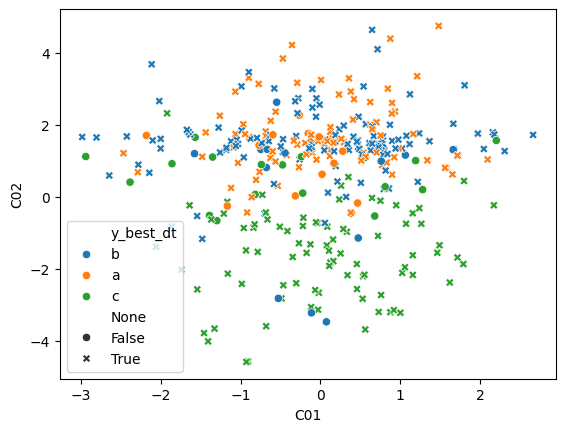

In [29]:
sns.scatterplot(x=attributes[0], y=attributes[1], data=X_test, hue='y_best_dt', style = (y_test == X_test['y_best_dt']) )